<a href="https://colab.research.google.com/github/AashrithPemmaraju06/Shopper-Spectrum-Project/blob/main/Customer_Segmentation_and_Product_Recommendations_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer Segmentation and Product Recommendations Project**
## **By - Aashrith Pemmaraju**

#**GITHUB LINK**

https://github.com/AashrithPemmaraju06/Shopper-Spectrum-Project

#**PROJECT SUMMARY**

Shopper Spectrum is a machine learning project that analyzes e-commerce transactions to:

 Segment customers using RFM (Recency, Frequency, Monetary) analysis and KMeans clustering.

 Recommend similar products using item-based collaborative filtering with cosine similarity.

 Streamlit web app allows:

* Entering a product name to get 5 recommendations.

* Inputting R, F, M values to predict customer segment.

It combines unsupervised learning and recommendation systems for real-world business insights like targeted marketing and personalized shopping.

#**PROBLEM STATEMENT**

To analyze e-commerce transaction data for identifying customer segments using RFM analysis and recommending similar products using collaborative filtering, enhancing personalization and business strategy.

#**PROJECT BEGINS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading Dataset from Google Drive to Dataframe
file_path = '/content/drive/My Drive/Labmentix Projects/Customer Segmentation and Product Recommendations Project/Project Details/online_retail.csv'
df = pd.read_csv(file_path)

##**1.Understanding the Dataset**

In [4]:
#Viewing the shape fo the dataset

df.shape

(541909, 8)

In [5]:
#Viewing the first 10 rows of the dataset

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2022-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2022-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2022-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2022-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**Dataset Description**

It consists of 541909 rows and 8 columns

The columns are :-

* InvoiceNo - It is the transaction number

* StockCode - It is a unique product/item code

* Description - It is the name of the product

* Quantity - It tells the number of products purchased

* InvoiceDate - It tells the date and time of transaction between 2022–2023

* UnitPrice - It tells the price per product

* CustomerID - It is a unique identifier for each customer

* Country - It specifies the country where the customer is based

In [7]:
#Viewing column data types and number  of non-null values for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
#Viewing the statistics of all the numeric columns

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
#Counting the number of missing values

df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [10]:
#Checking the number of duplicate rows

print('Number of Duplicate Rows are:',df.duplicated().sum())

Number of Duplicate Rows are: 5268


In [11]:
# Step 9: Find records with Negative Quantity and Zero or Negative Price

print("Rows with Negative Quantity:", (df['Quantity'] < 0).sum())
print("Rows with Zero or Negative Price:", (df['UnitPrice'] <= 0).sum())

Rows with Negative Quantity: 10624
Rows with Zero or Negative Price: 2517


##**2.Data Preprocessing**

In [12]:
#Removing rows with missing Customer ID

df = df[df['CustomerID'].notnull()]

In [13]:
#Removing cancelled transactions where InvoiceNo starts with 'C'

df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [14]:
#Keeping only rows where Quantity is positive, removing invalid or return transactions

df = df[df['Quantity'] > 0]

In [15]:
#Keep only rows with positive UnitPrice

df = df[df['UnitPrice'] > 0]

In [16]:
# Calculating total price (for later usage)

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

/tmp/ipython-input-1751176868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [17]:
#Checking number of rows after cleaning

print("Number of rows after cleaning:", df.shape[0])

Number of rows after cleaning: 397884


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
 8   TotalPrice   397884 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.4+ MB


In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


##**3. Exploratory Data Analysis (EDA)**

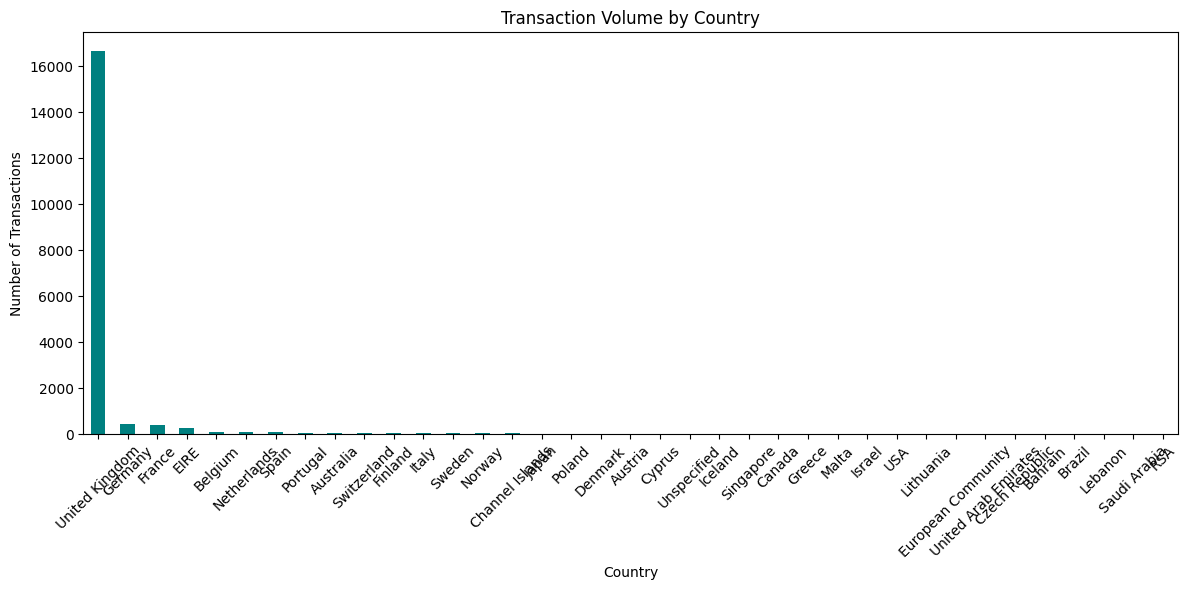

In [20]:
country_tx = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12,6))
country_tx.plot(kind='bar', color='teal')
plt.title("Transaction Volume by Country")
plt.ylabel("Number of Transactions")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2667157373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=txn_by_country.index[:10], y=txn_by_country.values[:10], palette='viridis')


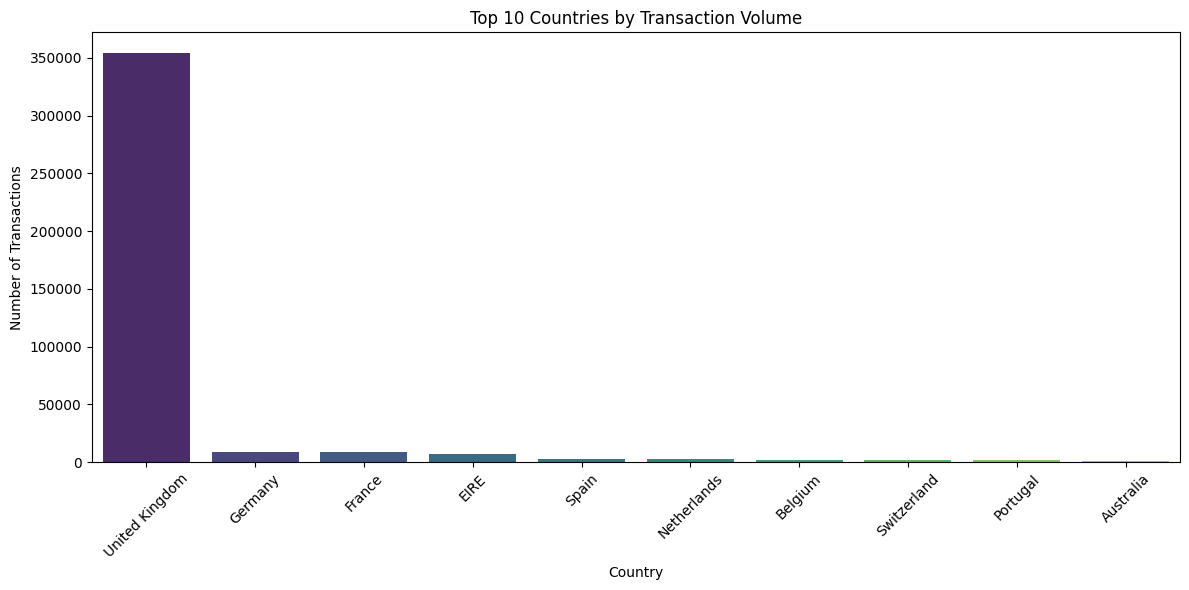

In [21]:
#Analyzing Transaction Volume by Country

txn_by_country = df['Country'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=txn_by_country.index[:10], y=txn_by_country.values[:10], palette='viridis')
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3842369897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


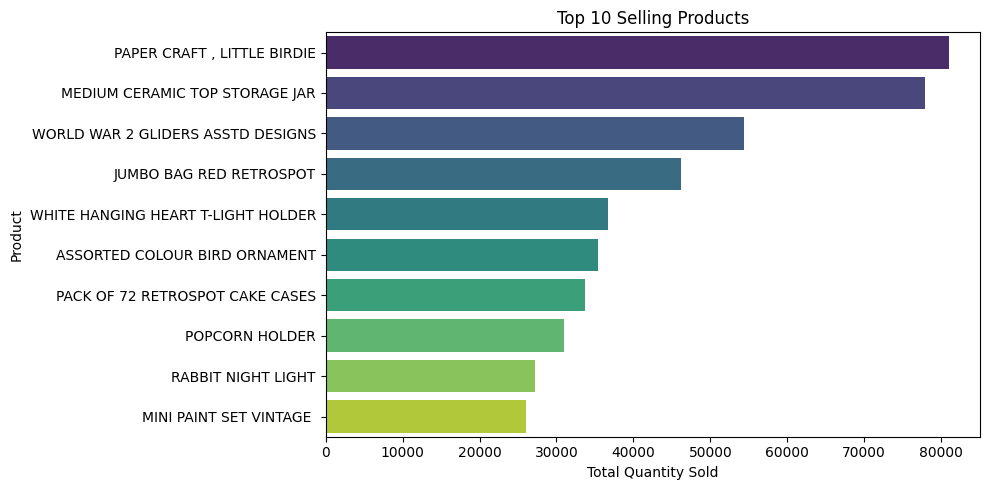

In [22]:
#Identifying the top 10 selling products

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1886223002.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df_time.resample('M').size().reset_index()


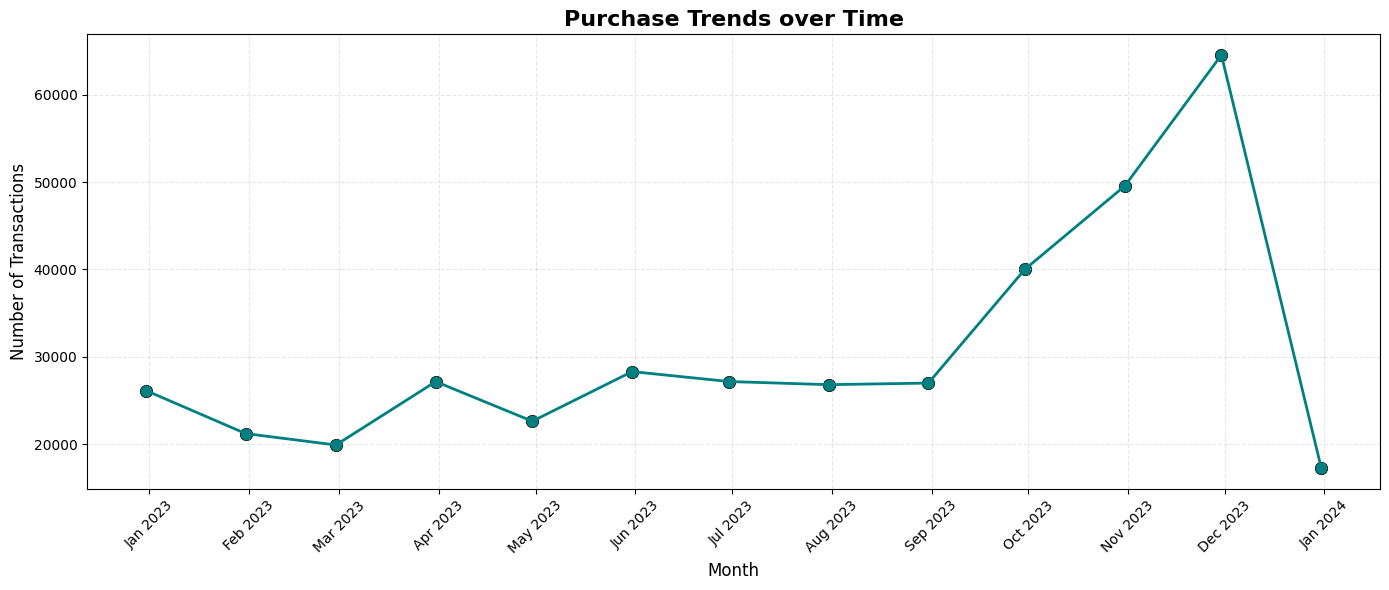

In [23]:
#Vizualizing Purchase Trends over Time

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_time = df.set_index('InvoiceDate')
monthly_counts = df_time.resample('M').size().reset_index()

plt.figure(figsize=(14,6))
plt.plot(monthly_counts['InvoiceDate'], monthly_counts[0], marker='o', color='teal', linewidth=2)
plt.scatter(monthly_counts['InvoiceDate'], monthly_counts[0], color='teal', s=80, edgecolors='black', linewidths=0.5)
plt.title('Purchase Trends over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

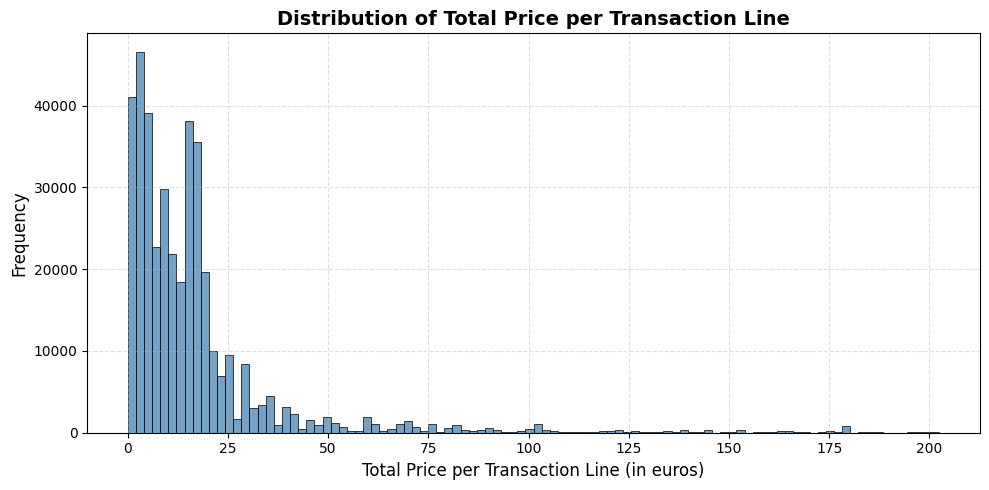

In [24]:
#Vizualizing TotalPrice per transaction line

cap = df['TotalPrice'].quantile(0.99)

plt.figure(figsize=(10,5))
sns.histplot(df[df['TotalPrice'] <= cap]['TotalPrice'], bins=100, color='steelblue')

plt.title('Distribution of Total Price per Transaction Line', fontsize=14, fontweight='bold')
plt.xlabel('Total Price per Transaction Line (in euros)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [25]:
#Creating RFM

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,8,2506.04
6,12353.0,204,1,89.00
7,12354.0,232,1,1079.40
8,12355.0,214,1,459.40
9,12356.0,23,3,2811.43


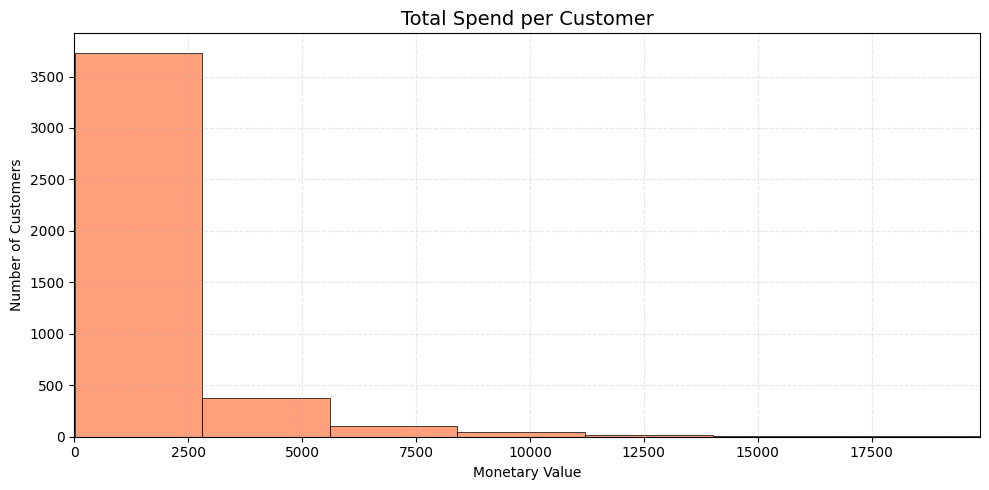

In [26]:
#Vizualizing Total Spend per Customer

plt.figure(figsize=(10,5))
sns.histplot(rfm['Monetary'], bins=100, color='coral')
plt.xlim(0, rfm['Monetary'].quantile(0.99))  # Optional: zoom to remove outliers
plt.title('Total Spend per Customer', fontsize=14)
plt.xlabel('Monetary Value')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

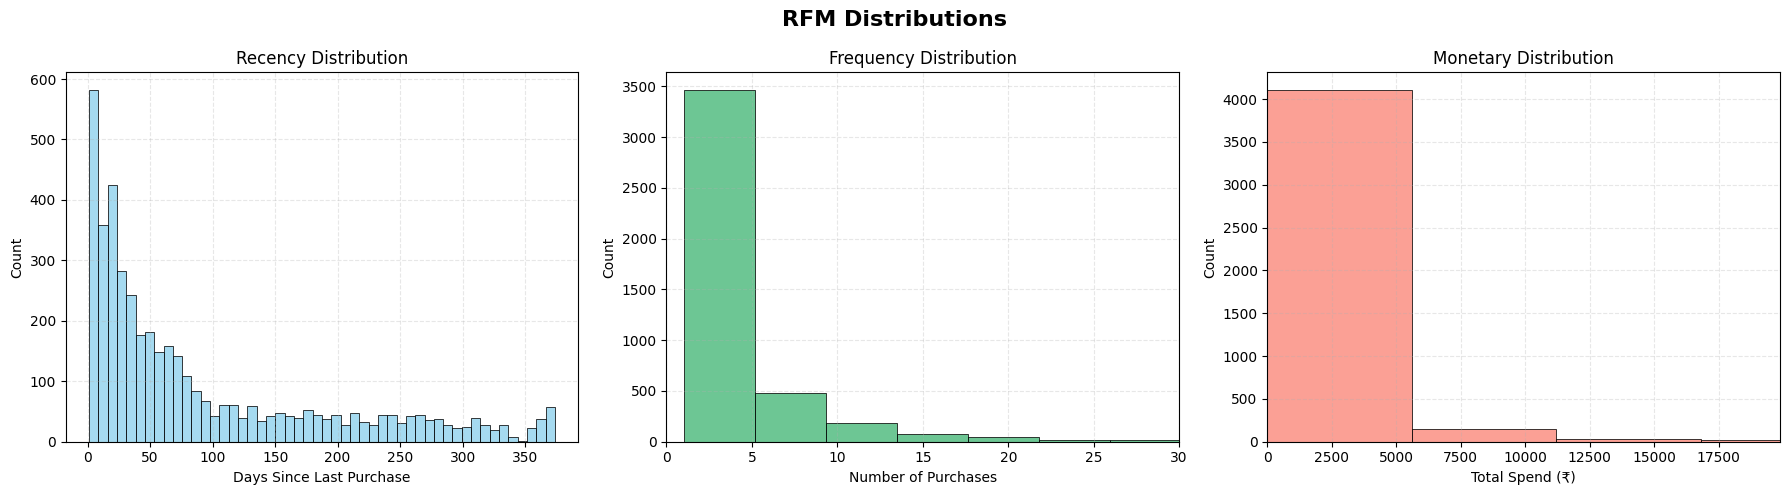

In [27]:
#Viewing the RFM Distributions

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Recency
sns.histplot(rfm['Recency'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Recency Distribution')
ax[0].set_xlabel('Days Since Last Purchase')
ax[0].grid(True, linestyle='--', alpha=0.3)

# Frequency
sns.histplot(rfm['Frequency'], bins=50, ax=ax[1], color='mediumseagreen')
ax[1].set_title('Frequency Distribution')
ax[1].set_xlabel('Number of Purchases')
ax[1].set_xlim(0, rfm['Frequency'].quantile(0.99))
ax[1].grid(True, linestyle='--', alpha=0.3)

# Monetary
sns.histplot(rfm['Monetary'], bins=50, ax=ax[2], color='salmon')
ax[2].set_title('Monetary Distribution')
ax[2].set_xlabel('Total Spend (₹)')
ax[2].set_xlim(0, rfm['Monetary'].quantile(0.99))
ax[2].grid(True, linestyle='--', alpha=0.3)

plt.suptitle('RFM Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [29]:
#Standardizing RFM Values and computing Inertia and Silhouette Scores for Multiple K Values

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(rfm_scaled)
    inertia.append(kmeans_model.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, kmeans_model.labels_))

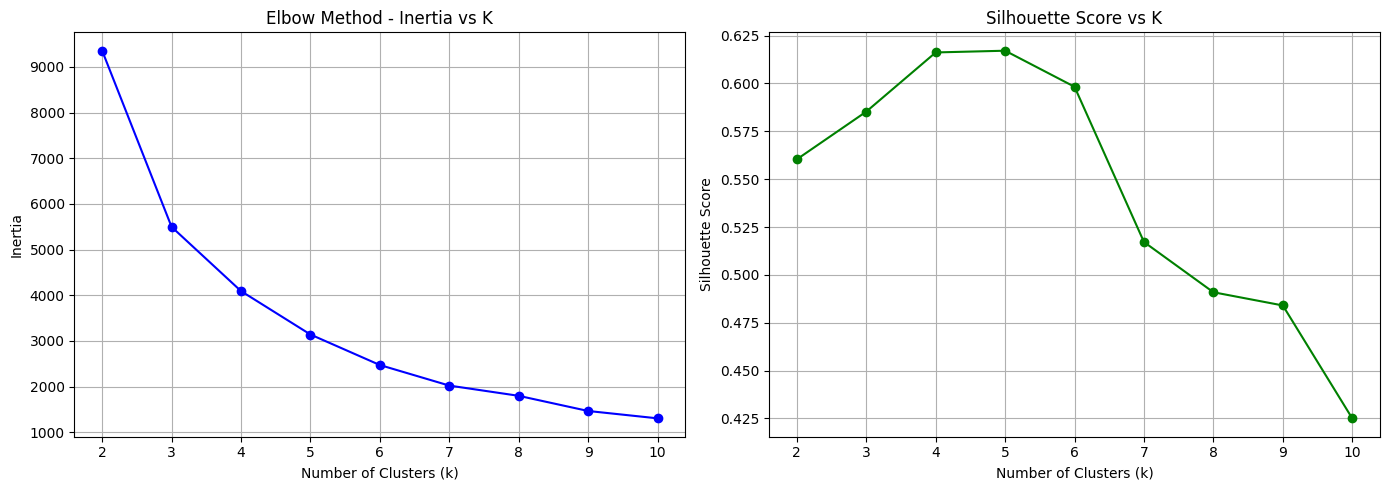

In [30]:
#Plotting the Elbow Curve and Silhouette Score

plt.figure(figsize=(14,5))

# Elbow (Inertia)
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method - Inertia vs K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Silhouette
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'go-')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [31]:
# View average RFM values per cluster for 3 clusters

kmeans_model= KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans_model.fit_predict(rfm_scaled)

cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
segment_map = {
    0: 'Regular',
    1: 'At-Risk',
    2: 'High-Value'
}

rfm['Segment'] = rfm['Cluster'].map(segment_map)
print(cluster_profiles)

         Recency  Frequency   Monetary
Cluster                               
0          40.98       4.85    2012.11
1         246.02       1.58     631.14
2           7.14      80.21  122888.41


In [32]:
# View average RFM values per cluster for 4 clusters

kmeans_model = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans_model.fit_predict(rfm_scaled)

cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
segment_map = {
    0: 'Regular',
    1: 'At-Risk',
    2: 'High-Value',
    3: 'Potential'
}

rfm['Segment'] = rfm['Cluster'].map(segment_map)
print(cluster_profiles)

         Recency  Frequency   Monetary
Cluster                               
0          43.70       3.68    1359.05
1         248.08       1.55     480.62
2           7.38      82.54  127338.31
3          15.50      22.33   12709.09


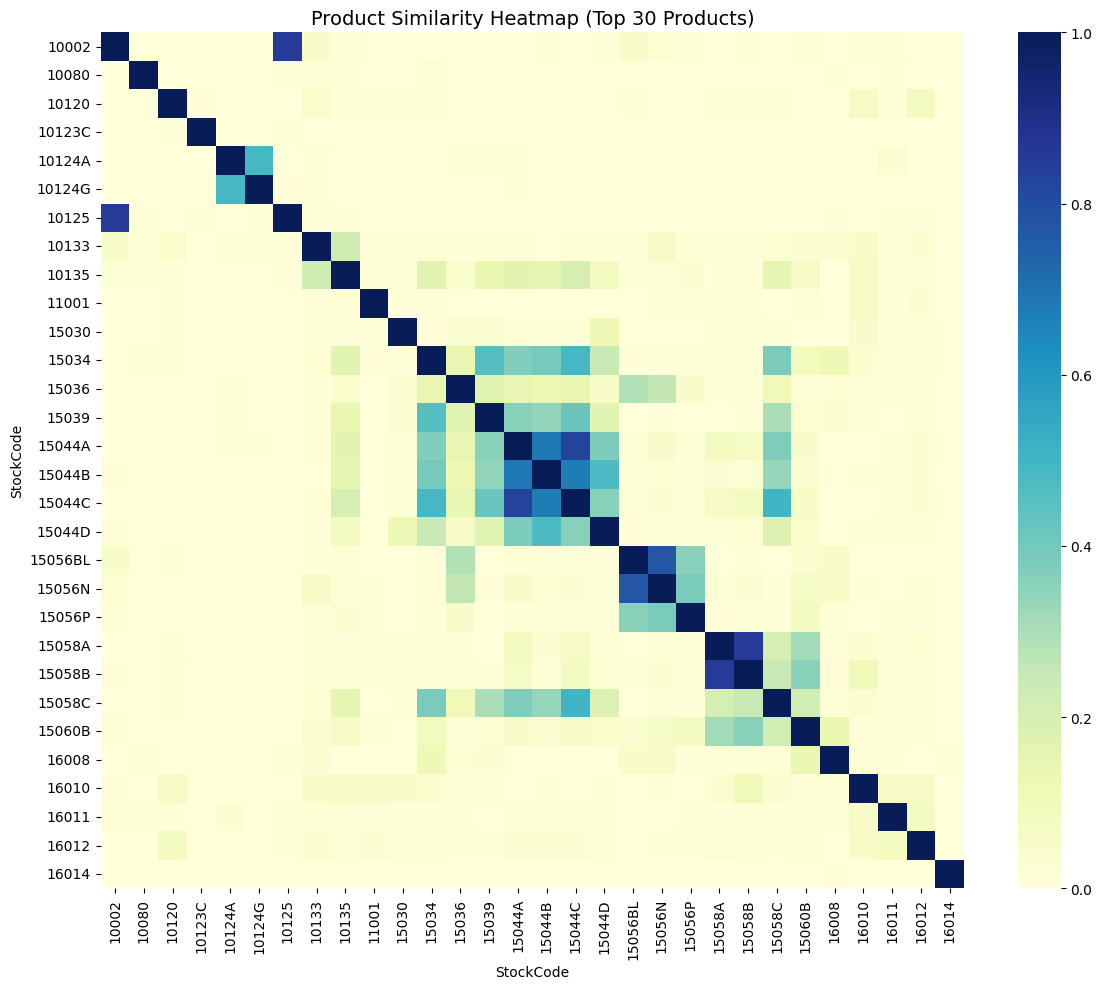

In [33]:
#Product Similarity Heatmap

from sklearn.metrics.pairwise import cosine_similarity

basket = df.pivot_table(index='CustomerID',
                        columns='StockCode',
                        values='Quantity',
                        aggfunc='sum').fillna(0)

product_similarity = cosine_similarity(basket.T)
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=basket.columns,
                                     columns=basket.columns)

top_n = 30
subset = product_similarity_df.iloc[:top_n, :top_n]

plt.figure(figsize=(12,10))
sns.heatmap(subset, cmap='YlGnBu')
plt.title('Product Similarity Heatmap (Top 30 Products)', fontsize=14)
plt.tight_layout()
plt.show()

##**4.Clustering Methodology**

In [34]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,1,77183.60,3,Potential
1,12347.0,2,7,4310.00,0,Regular
2,12348.0,75,4,1797.24,0,Regular
3,12349.0,19,1,1757.55,0,Regular
4,12350.0,310,1,334.40,1,At-Risk


In [35]:
#K Means Clustering with 4 clusters

from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans_model.fit_predict(rfm_scaled)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,1,77183.60,3,Potential
1,12347.0,2,7,4310.00,0,Regular
2,12348.0,75,4,1797.24,0,Regular
3,12349.0,19,1,1757.55,0,Regular
4,12350.0,310,1,334.40,1,At-Risk


In [36]:
#Viewing Cluster Profiles

rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,43.70,3.68,1359.05
1,248.08,1.55,480.62
2,7.38,82.54,127338.31
3,15.50,22.33,12709.09


In [37]:
# Assigning Labels to Clusters and checking how many customers fall into each segment

segment_map = {
    2: 'High-Value',
    3: 'Potential',
    0: 'Regular',
    1: 'At-Risk'
}

rfm['Segment'] = rfm['Cluster'].map(segment_map)
rfm['Segment'].value_counts()

,count
Segment,
Regular,3054
At-Risk,1067
Potential,204
High-Value,13


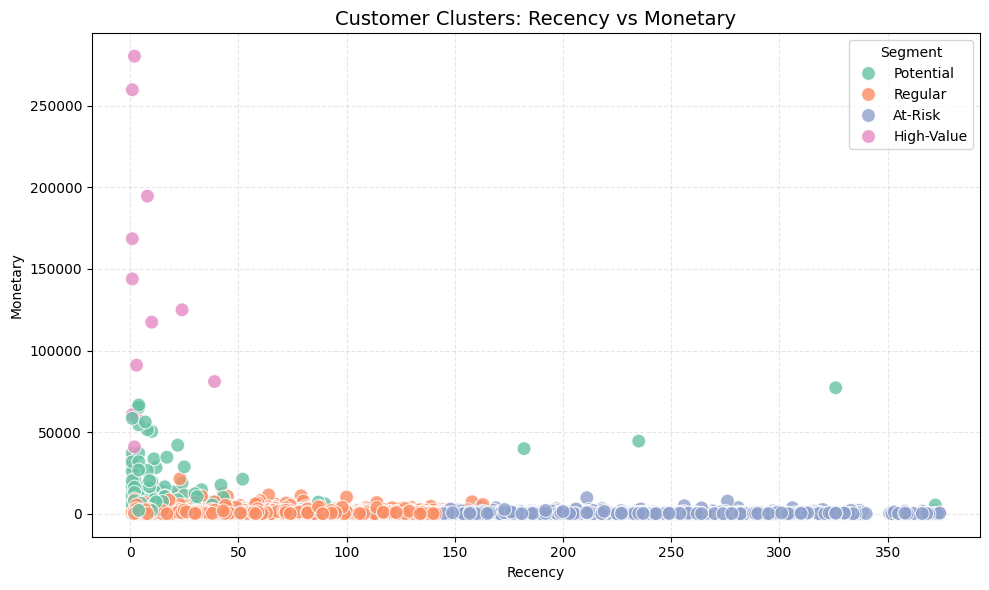

In [38]:
#2D Scatter Plot of Recency vs Monetary

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Monetary',
    hue='Segment',
    palette='Set2',
    s=100,
    alpha=0.8
)

plt.title('Customer Clusters: Recency vs Monetary', fontsize=14)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


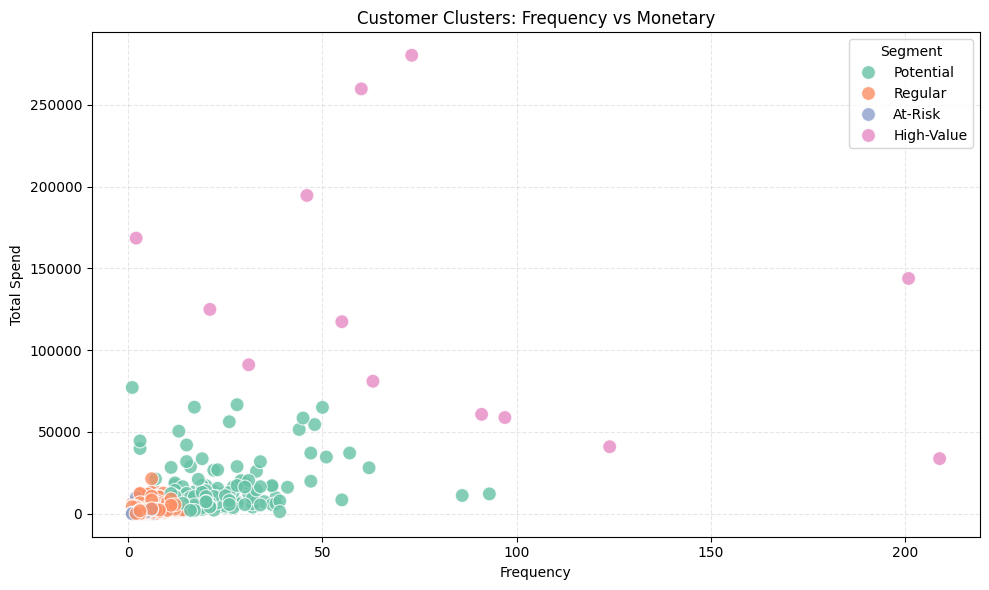

In [39]:
#2D Scatter Plot of Frequency vs Monetary

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Clusters: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Total Spend')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

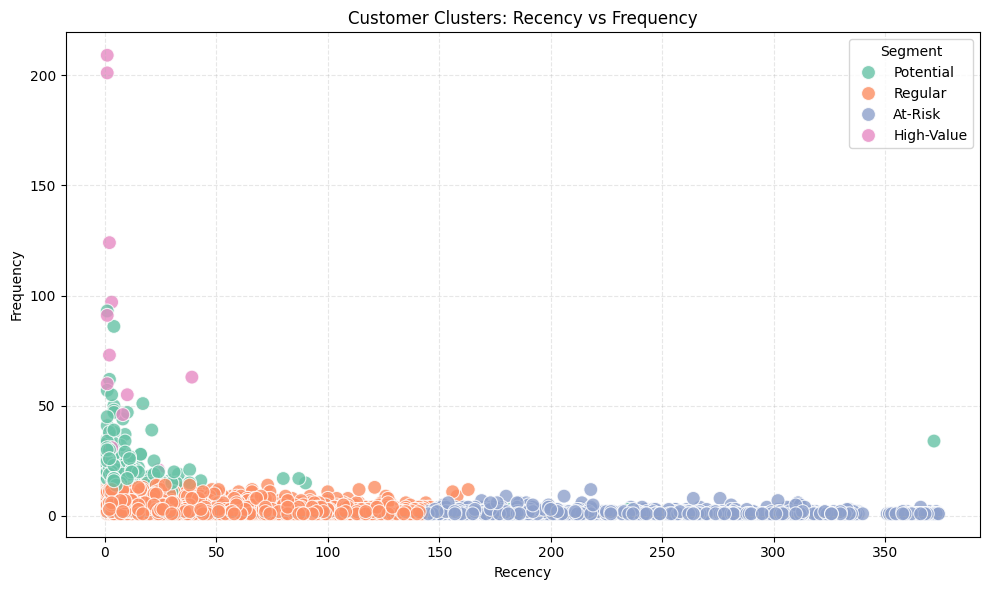

In [40]:
#2D Scatter Plot of Recency vs Frequency

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Clusters: Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

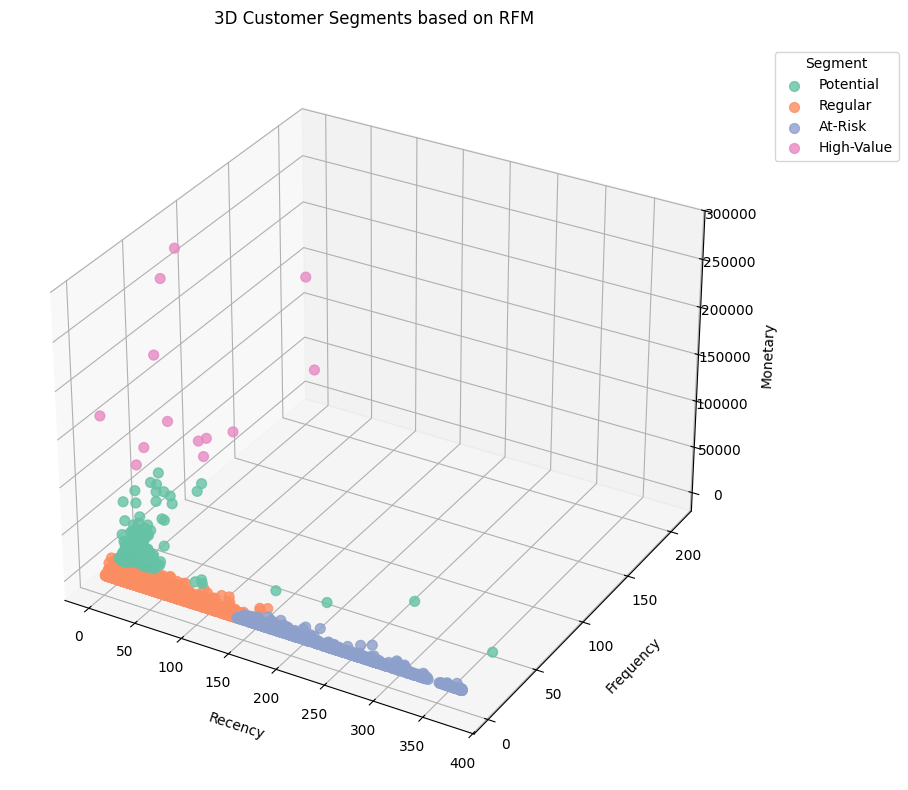

In [41]:
#3D Scatter Plot

from mpl_toolkits.mplot3d import Axes3D

segments = rfm['Segment'].unique()
colors = sns.color_palette('Set2', n_colors=len(segments))
color_map = dict(zip(segments, colors))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for segment in segments:
    subset = rfm[rfm['Segment'] == segment]
    ax.scatter(
        subset['Recency'],
        subset['Frequency'],
        subset['Monetary'],
        label=segment,
        s=50,
        alpha=0.8,
        color=color_map[segment]
    )

ax.set_xlabel('Recency', labelpad=10)
ax.set_ylabel('Frequency', labelpad=10)
ax.set_zlabel('Monetary', labelpad=10)
ax.set_title('3D Customer Segments based on RFM', pad=20)

ax.legend(title='Segment', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

##**5.Product Recommendation System (Collaborative Filtering)**

In [42]:
#Creating Customer x Product matrix using total Quantity purchased

pivot_table = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0)

print("Shape of pivot table:", pivot_table.shape)
pivot_table.head()

Shape of pivot table: (4338, 3665)


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
#Computing Cosine Similarity Between Products

from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

product_similarity = cosine_similarity(pivot_table.T)
similarity_df = pd.DataFrame(
    product_similarity,
    index=pivot_table.columns,
    columns=pivot_table.columns)

similarity_df.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.001548,0.000990,0.0,0.000000,0.853890,0.052085,0.021921,0.003033,...,0.0,0.0,0.0,0.0,0.0,0.038765,0.0,0.000307,0.0,0.074260
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.004958,0.020646,0.011878,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000006,0.0,0.000000
10120,0.001548,0.0,1.000000,0.004903,0.0,0.000000,0.001600,0.042543,0.010420,0.009962,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.007643,0.0,0.000331
10123C,0.000990,0.0,0.004903,1.000000,0.0,0.000000,0.004417,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.491784,0.001099,0.014967,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [44]:
#Mapping Product Codes to Product Names

product_map = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()
reverse_map = {v: k for k, v in product_map.items()}

list(product_map.items())[:5]

[('85123A', 'CREAM HANGING HEART T-LIGHT HOLDER'),
 ('71053', 'WHITE MOROCCAN METAL LANTERN'),
 ('84406B', 'CREAM CUPID HEARTS COAT HANGER'),
 ('84029G', 'KNITTED UNION FLAG HOT WATER BOTTLE'),
 ('84029E', 'RED WOOLLY HOTTIE WHITE HEART.')]

In [45]:
#Defining Product Recommendation Function

def recommend_products(product_name, top_n=5):
    if product_name not in reverse_map:
        return ["Product not found."]

    stock_code = reverse_map[product_name]
    sim_scores = similarity_df[stock_code].sort_values(ascending=False)
    top_similar = sim_scores.iloc[1:top_n+1].index
    recommendations = [product_map.get(code, f"Unknown Product ({code})") for code in top_similar]
    return recommendations

In [46]:
recommend_products("REX CASH+CARRY JUMBO SHOPPER")

['ROSE SCENT CANDLE JEWELLED DRAWER',
 'LAZER CUT NECKLACE W PASTEL BEADS',
 'PACK 4 FLOWER/BUTTERFLY PATCHES',
 'SILVER FLOWR PINK SHELL NECKLACE',
 'SMALL WHITE RETROSPOT MUG IN BOX ']

In [47]:
import pickle
from google.colab import files

with open('similarity.pkl', 'wb') as f:
    pickle.dump(similarity_df, f)

with open('product_map.pkl', 'wb') as f:
    pickle.dump(product_map, f)

with open('reverse_map.pkl', 'wb') as f:
    pickle.dump(reverse_map, f)

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

files.download('similarity.pkl')
files.download('product_map.pkl')
files.download('reverse_map.pkl')
files.download('kmeans_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>